In [1]:
import sys
sys.path.append('..')

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from gaussian_process import GaussianProcessRegression
from gaussian_process.kernels import RBF
from gaussian_process.datasets import generate_gp

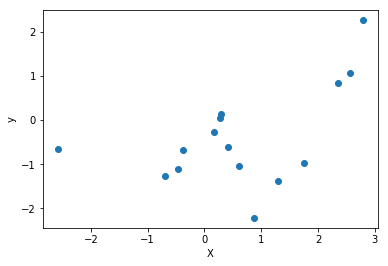

In [3]:
X, y = generate_gp(n_samples=15, kernel=RBF(3, 5), random_state=0, noise=0.1)
plt.xlabel('X')
plt.ylabel('y')
plt.plot(X[:,0], y, 'o')

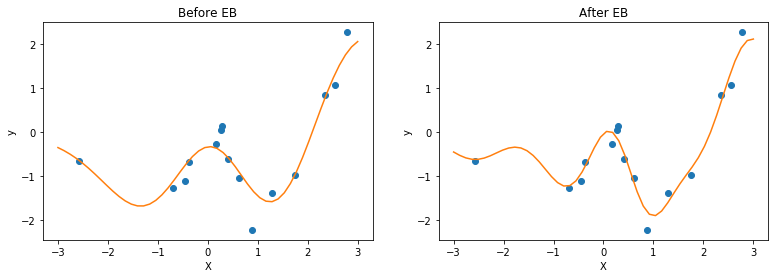

In [4]:
gpr = GaussianProcessRegression(cov=RBF(), sigma=0.1)
gpr.fit(X, y)
Xtest = np.linspace(-3, 3).reshape(-1, 1)
ypred_pre_opt = gpr.predict(Xtest)
before_eb = str(gpr)
gpr.empirical_bayes()
ypred_post_opt = gpr.predict(Xtest)
post_eb = str(gpr)
fig, axes = plt.subplots(ncols=2, figsize=(13, 4))
axes[0].set_title('Before EB')
axes[1].set_title('After EB')
axes[0].set_xlabel('X')
axes[1].set_xlabel('X')
axes[0].set_ylabel('y')
axes[1].set_ylabel('y')
axes[0].plot(X[:, 0], y, 'o')
axes[1].plot(X[:, 0], y, 'o')
axes[0].plot(Xtest[:, 0], ypred_pre_opt)
axes[1].plot(Xtest[:, 0], ypred_post_opt)
eb_params = gpr.get_params()

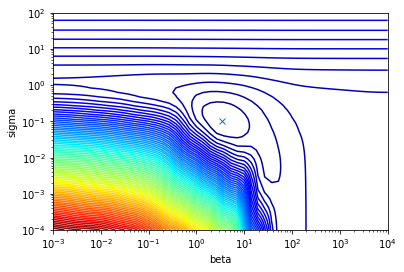

In [5]:
X1, X2 = np.meshgrid(10**np.linspace(-3, 4), 10**np.linspace(-4, 2))
f = np.zeros_like(X1)
for i, j in [(i, j) for i in range(X1.shape[0]) for j in range(X1.shape[1])]:
    gpr.set_params(cov__beta=X1[i,j], sigma=X2[i, j])
    f[i, j] = gpr.log_marginal_likelihood()
z = np.log(-f)
plt.loglog()
plt.contour(X1, X2, z, cmap='jet', levels=np.linspace(np.min(z), np.max(z), 80))
plt.xlabel('beta')
plt.ylabel('sigma')
plt.plot([eb_params['cov__beta']], [eb_params['sigma']], 'x')